## Linear regression

In [1]:
import numpy as np
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best


array([[4.51716722],
       [3.01240083]])

In [2]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51716722],
       [10.54196888]])

In [3]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.51716722] [[3.01240083]]
[[ 4.51716722]
 [10.54196888]]


## Gradient descent

In [5]:
# Batch Gradient Descent
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.51716722],
       [3.01240083]])

In [6]:
# Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t + t1)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[4.53315887],
       [3.0147521 ]])

In [7]:
# sklearn SGDRegression
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter = 50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

C:\Users\zxj19\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([4.52069092]), array([3.01873574]))

## Polynomial Regression

In [8]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[2.2629649]
[2.2629649  5.12101015]


In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.96530446]), array([[0.97810479, 0.48110788]]))

## Learning Curves

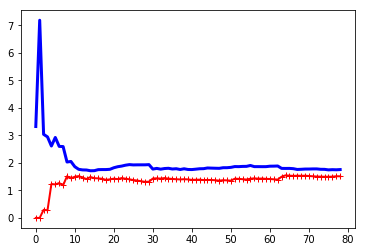

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors= [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

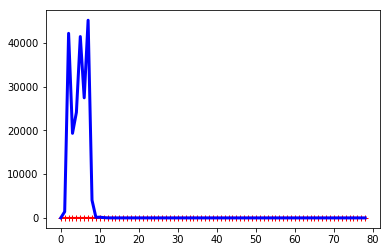

In [11]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)


## Regularization
### Ridge regression
$$J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n}{\theta_i^2}$$
the bias term $\theta_0$ is not regularized
It is important to scale the data. The regularizer is sensitive to the scale.
Closed solution:
$$\hat{\theta} = (X^T X + \alpha A)^{-1} X^T y$$
A is nxn identity matrix except that [1,1] is 0 corresponding to the bias term

In [12]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver = 'cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.2016339]])

In [19]:
sgd_reg = SGDRegressor(penalty='l2') 
#'l2' means the regularization term equal to half the square of the l2 norm of the weight vector
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\zxj19\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([4.51174881])

### Lasso regression (least absolute shrinkage and selection operator regression)
$$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n}{|{\theta_i}|}$$
Lasso tends to completely eliminate weights of the least important features (i.e. set them to 0)
Automatically performs feature selection and outputs a sparse model.

In [20]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.1664154])

### Elastic Net
$$J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^{n}|\theta_i| + \frac{1-r}{2}\alpha\sum_{i=1}^{n}{\theta_i^2}$$
middle ground between Ridge Regression and Lasso Regression  
mix ratio r

In [21]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.16365622])

## Early stopping
Stop as soon as the validation error starts to grow

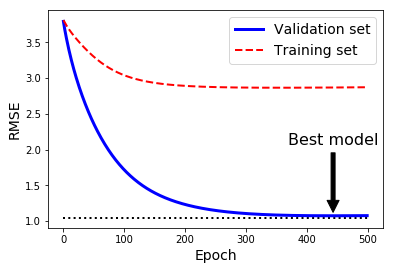

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m,1)
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler()),
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)
sgd_reg = SGDRegressor(max_iter=1,
                      penalty=None,
                      eta0=0.0005,
                       warm_start=True,
                       learning_rate='constant',
                       random_state=42)
n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_val_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])
plt.annotate('Best model', xy=(best_epoch, best_val_rmse),
            xytext=(best_epoch, best_val_rmse + 1),
            ha='center',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16)
best_val_rmse -= 0.03
plt.plot([0, n_epochs],[best_val_rmse, best_val_rmse], 'k:', linewidth=2)
plt.plot(np.sqrt(val_errors),'b-', linewidth=3, label='Validation set')
plt.plot(np.sqrt(train_errors), 'r--', linewidth=2, label='Training set')
plt.legend(loc='upper right', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.show()

## Logistic regression
### estimating probabilities

In [4]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

['data', 'target', 'target_names', 'DESCR', 'feature_names']


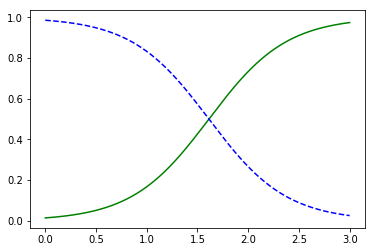

In [7]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not Iris-Virginica')
plt.show()

### Softmax regression
$$\hat{p_k} = \sigma (s(x))_k  = \frac{exp(s_k(x))}{\sum _{j=1}^{K} exp(s_j(x))}$$

In [9]:
X = iris['data'][:,(2,3)]
y = iris['target']
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C=10)
softmax_reg.fit(X,y)
print(softmax_reg.predict_proba([[5,2]]))
softmax_reg.predict([[5,2]])

[[6.33134077e-07 5.75276067e-02 9.42471760e-01]]


array([2])